In [1]:
import os
import cv2
import numpy as np

def load_ecg_images(folder_path):
    
    images = []
    labels = []

    # Dictionary mapping folder names to class labels
    class_labels = {
        "ECG Images of Myocardial Infarction Patients (240x12=2880)": 0,
        "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": 1,
        "ECG Images of Patient that have History of MI (172x12=2064)": 2,
        "Normal Person ECG Images (284x12=3408)": 3
    }

    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"): 
                image_path = os.path.join(class_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #convert to grayscale
                if image is not None:
                    images.append(image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

dataset = "/Users/parthbehl/machine learning/deeplearning /ecg_classifier/data"
images, labels = load_ecg_images(dataset)
print("Number of images:", len(images))
print("Number of labels:", len(labels))
print("Label distribution:", np.bincount(labels.astype(int)))


Number of images: 926
Number of labels: 926
Label distribution: [238 233 172 283]


(1572, 2213)


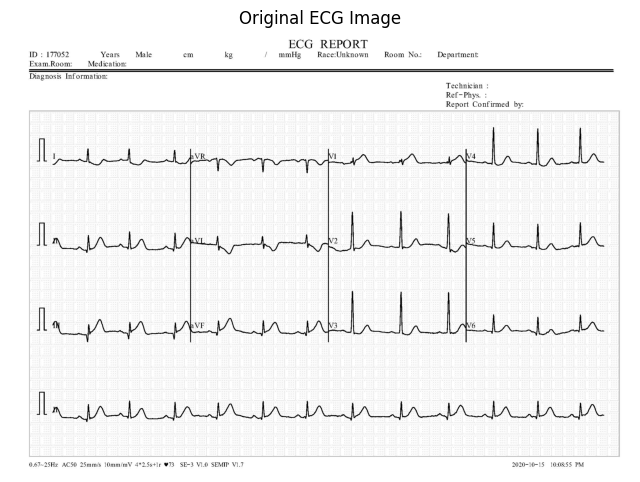

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load a image to work on 
sample_image_path = "/Users/parthbehl/machine learning/deeplearning /ecg_classifier/data/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI(222).jpg"  # Replace this with the path to your sample image
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
print(sample_image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(sample_image, cmap='gray')
plt.title("Original ECG Image")
plt.axis('off')
plt.show()


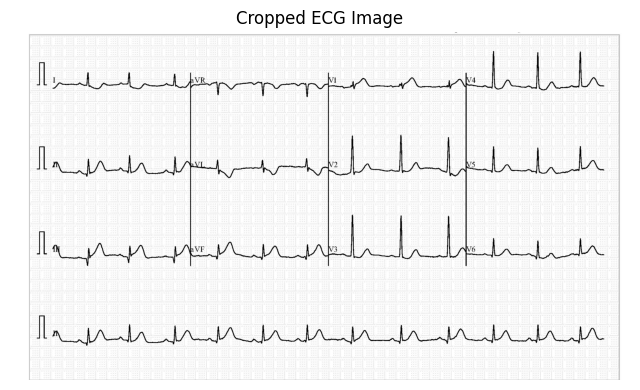

In [6]:
#adjust the factors to crop

crop_top = 275  
crop_bottom = 56  

# Crop the image
cropped_image = sample_image[crop_top:-crop_bottom, :]

plt.figure(figsize=(8, 8))
plt.imshow(cropped_image, cmap='gray')
plt.title("Cropped ECG Image")
plt.axis('off')
plt.show()


In [7]:
import os
import cv2
import numpy as np

def load_ecg_images(folder_path, crop_top=275, crop_bottom=56):

    images = []
    labels = []
    class_labels = {
        "ECG Images of Myocardial Infarction Patients (240x12=2880)": 0,
        "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": 1,
        "ECG Images of Patient that have History of MI (172x12=2064)": 2,
        "Normal Person ECG Images (284x12=3408)": 3
    }

    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"):  
                image_path = os.path.join(class_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    cropped_image = image[crop_top:-crop_bottom, :]
                    images.append(cropped_image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

dataset = "/Users/parthbehl/machine learning/deeplearning /ecg_classifier/data"
images, labels = load_ecg_images(dataset)
print("Number of images:", len(images))
print("Number of labels:", len(labels))
print("Label distribution:", np.bincount(labels.astype(int)))


Number of images: 926
Number of labels: 926
Label distribution: [238 233 172 283]


In [8]:
import cv2
import numpy as np

def preprocess_images(images, target_size=(150, 150)):
    
    preprocessed_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        # Normalize image pixel values to range [0, 1]
        normalized_image = resized_image / 255.0
        preprocessed_images.append(normalized_image)
    preprocessed_images = np.array(preprocessed_images)
    return preprocessed_images

dataset = "/Users/parthbehl/machine learning/deeplearning /ecg_classifier/data"
images, labels = load_ecg_images(dataset)

preprocessed_images = preprocess_images(images)
print("Shape of preprocessed images:", preprocessed_images.shape)


Shape of preprocessed images: (926, 150, 150)


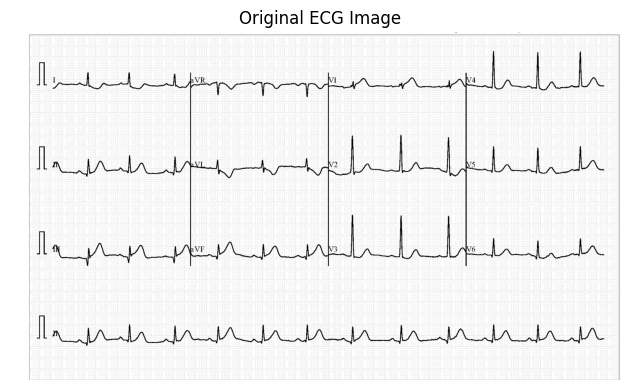

In [9]:
#randomly generate an image from any label to check 
import cv2
import matplotlib.pyplot as plt
image_index = 0
sample_image = images[image_index]
plt.figure(figsize=(8, 8))
plt.imshow(sample_image, cmap='gray')
plt.title("Original ECG Image")
plt.axis('off')
plt.show()


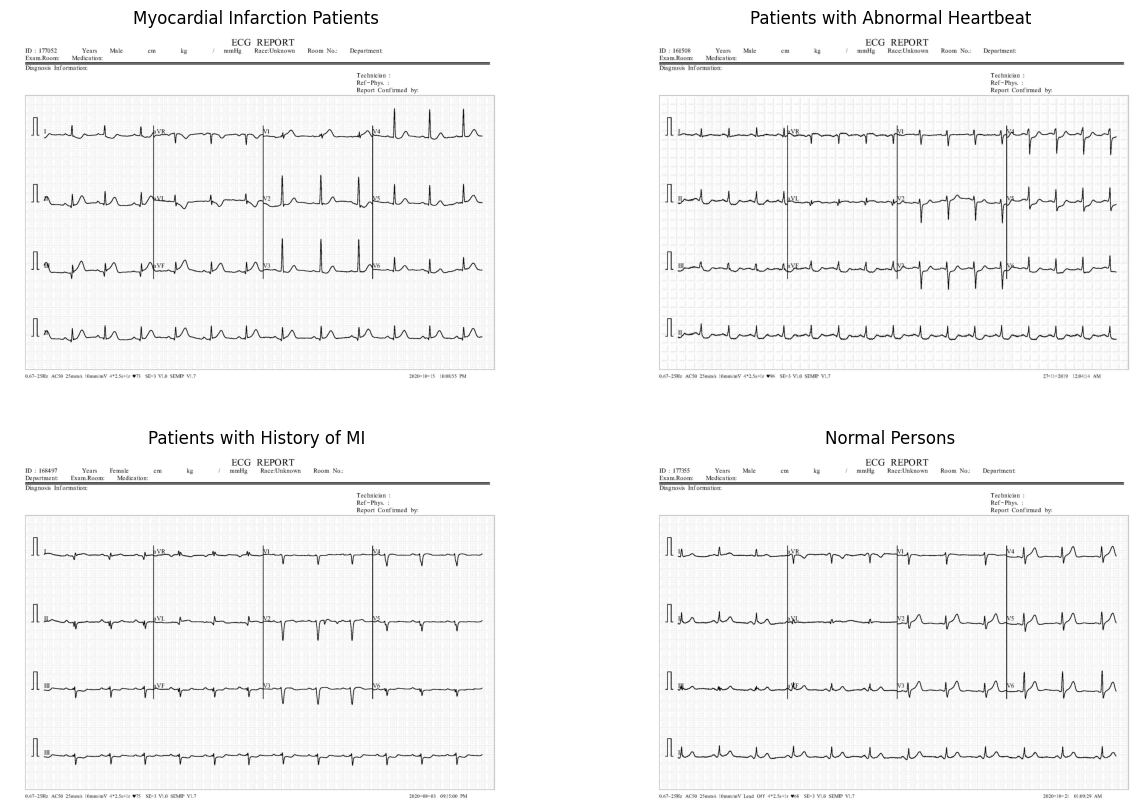

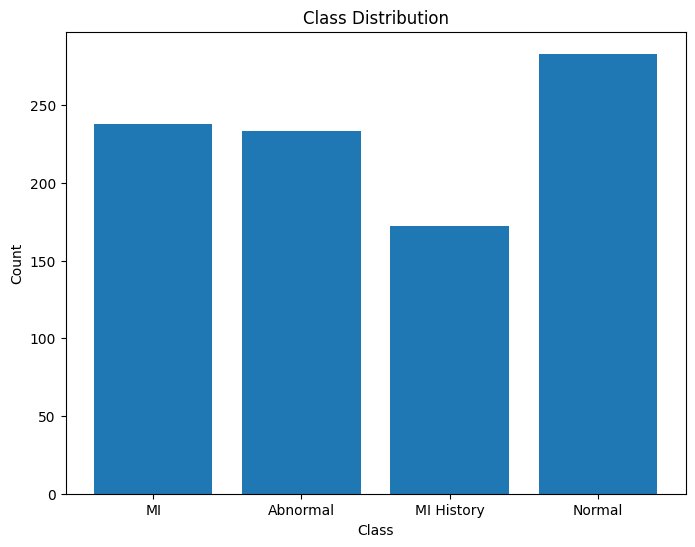

Class Imbalance Ratio: 1.6453488372093024


In [10]:
#applyin EDA 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_ecg_images_with_labels(folder_path):
    
    images = []
    labels = []

    class_labels = {
        "ECG Images of Myocardial Infarction Patients (240x12=2880)": 0,
        "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": 1,
        "ECG Images of Patient that have History of MI (172x12=2064)": 2,
        "Normal Person ECG Images (284x12=3408)": 3
    }

    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"): 
                image_path = os.path.join(class_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
                if image is not None:
                    images.append(image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

dataset = "/Users/parthbehl/machine learning/deeplearning /ecg_classifier/data"
images, labels = load_ecg_images_with_labels(dataset)

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(["Myocardial Infarction Patients", "Patients with Abnormal Heartbeat", "Patients with History of MI", "Normal Persons"]):
    class_indices = np.where(labels == i)[0]
    sample_index = class_indices[0]  # first image of each class
    sample_image = images[sample_index]
    plt.subplot(2, 2, i+1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
class_names = ["MI", "Abnormal", "MI History", "Normal"]
class_counts = np.bincount(labels)
plt.bar(class_names, class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
min_class_count = np.min(class_counts)
max_class_count = np.max(class_counts)
class_imbalance_ratio = max_class_count / min_class_count   #find class imbalane- chatgpt krke dekh lio meaning
print("Class Imbalance Ratio:", class_imbalance_ratio)


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (150, 150, 1)  # Verify the shape from above (i/p:19)
num_classes = 4  # Total 4 classes(files)

model = create_cnn_model(input_shape, num_classes)

# Compile model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


ModuleNotFoundError: No module named 'distutils'

In [17]:
!pip install setuptools


In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(preprocessed_images, labels, test_size=0.2, random_state=42)

# # Reshape the input data to fit the CNN model (add channel dimension for grayscale images)
# X_train = np.expand_dims(X_train, axis=-1)
# X_val = np.expand_dims(X_val, axis=-1)

# # Define model callbacks (optional)
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
#     tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
# ]

# # Train the model
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

# # Evaluate the model on the validation set
# val_loss, val_accuracy = model.evaluate(X_val, y_val)

# print("Validation Loss:", val_loss)
# print("Validation Accuracy:", val_accuracy)


In [ ]:
#plot confusion matrix and graphs

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

best_model = tf.keras.models.load_model("best_model.keras")
X_test_preprocessed = preprocess_images(X_test)
X_test_preprocessed = np.expand_dims(X_test_preprocessed, axis=-1)
y_pred_prob = best_model.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred_prob, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
misclassified_indexes = np.where(y_pred != y_test)[0]
num_misclassified = len(misclassified_indexes)
print("Number of misclassified samples:", num_misclassified)
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indexes[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'True: {class_labels[y_test[idx]]}\nPredicted: {class_labels[y_pred[idx]]}')
    plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>

NameError: name 'preprocess_images' is not defined

In [ ]:

def preprocess_input_image(image_path, target_size=(150, 150), crop_top=275, crop_bottom=56):
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    #cropped_image = input_image[crop_top:-crop_bottom, :]

    resized_image = cv2.resize(cropped_image, target_size)

    # Normalize image pixel values to range [0, 1]
    preprocessed_image = resized_image / 255.0

    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

    return preprocessed_image

def classify_ecg_image(input_image, model):
    
    predicted_probabilities = model.predict(input_image)
    
    predicted_class = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class]

    return predicted_class, predicted_class_name

best_model = tf.keras.models.load_model("/Users/parthbehl/machine learning/deeplearning /ecg_classifier/best_model.keras")  # Replace with the path to your saved model file

input_image_path = "/Users/parthbehl/machine learning/deeplearning /MI(6).jpg"  # Replace with the path to your input image
preprocessed_input_image = preprocess_input_image(input_image_path)
predicted_class = classify_ecg_image(preprocessed_input_image, best_model)

print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class label: (0, 'MI')
